In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("a_data.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
del data['PRT_ID']
del data['REG_FEE']
del data['COMMIS']

In [4]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [6]:
data.describe

<bound method NDFrame.describe of             AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004  04-05-2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909  04-02-2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226  05-10-2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7104  Karapakkam       598  03-01-2011             51        1.0         1.0   
7105   Velachery      1897  08-04-2004             52        3.0         2.0   
7106   Velachery      1614  25-08-2006            152        2.0         1.0   
7107  Karapakkam       787  03-08-2009             40        1.0         1.0   
7108   Velachery      1896  13-07-2005            156        3.0         2.0   

     

In [7]:
data.columns= data.columns.str.lower()
data.columns

Index(['area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'sales_price'],
      dtype='object')

In [8]:
column = ['area','sale_cond','park_facil','buildtype','utility_avail','street','mzzone']
for i in column:
    print(data[i].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [9]:
data['area'] = data.area.replace({'Karapakam':'Karapakkam','Anna Nagar':'AnnaNagar','Ana Nagar':'AnnaNagar',
                                  'Ann Nagar':'AnnaNagar','Adyr':'Adyar', 'Velchery':'Velachery','KKNagar':'KK Nagar',
                                  'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpt':'Chrompet','Chormpet':'Chrompet','Chrmpet':'Chrompet'})
data['sale_cond'] = data.sale_cond.replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'}) 
data['park_facil'] = data.park_facil.replace({'Noo':'No'})
data['buildtype'] = data.buildtype.replace({'Comercial':'Commercial','Others':'Other'})
data['utility_avail'] = data.utility_avail.replace({'All Pub':'AllPub','NoSewr':'NoSewer','NoSeWa':'NoSewer', 'NoSewr ':'NoSewer'})
data['street'] = data.street.replace({'Pavd':'Paved','NoAccess':'No Access'})

In [10]:
for i in column:
    print(data[i].unique())

['Karapakkam' 'AnnaNagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Other' 'House']
['AllPub' 'ELO' 'NoSewer']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [11]:
data.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [12]:
data['date_sale'] = pd.to_datetime(data['date_sale'])
data['date_build'] = pd.to_datetime(data['date_build'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7109 non-null   object        
 1   int_sqft       7109 non-null   int64         
 2   date_sale      7109 non-null   datetime64[ns]
 3   dist_mainroad  7109 non-null   int64         
 4   n_bedroom      7108 non-null   float64       
 5   n_bathroom     7104 non-null   float64       
 6   n_room         7109 non-null   int64         
 7   sale_cond      7109 non-null   object        
 8   park_facil     7109 non-null   object        
 9   date_build     7109 non-null   datetime64[ns]
 10  buildtype      7109 non-null   object        
 11  utility_avail  7109 non-null   object        
 12  street         7109 non-null   object        
 13  mzzone         7109 non-null   object        
 14  qs_rooms       7109 non-null   float64       
 15  qs_bathroom    7109 n

In [14]:
age = data.date_sale - data.date_build
#to convert age in years
age.dt.days/365.25

0       43.890486
1       10.992471
2       19.581109
3       21.984942
4       29.574264
          ...    
7104    49.122519
7105     8.750171
7106    28.624230
7107    31.329227
7108    43.969884
Length: 7109, dtype: float64

In [15]:
data['age_yr'] = np.round(age.dt.days/365.25,1)
data

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,age_yr
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,43.9
1,AnnaNagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11.0
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,19.6
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Other,NoSewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22.0
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1.0,1.0,2,AdjLand,No,1962-01-15,Other,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49.1
7105,Velachery,1897,2004-08-04,52,3.0,2.0,5,Family,Yes,1995-11-04,Other,NoSewer,No Access,RH,3.6,4.5,3.3,3.920,10818480,8.8
7106,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,1978-01-09,House,NoSewer,Gravel,I,4.3,4.2,2.9,3.840,8351410,28.6
7107,Karapakkam,787,2009-03-08,40,1.0,1.0,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,31.3


In [16]:
del data['date_build']
del data['date_sale']

In [17]:
data.corr()

,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,age_yr
int_sqft,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.612125,-0.013038
dist_mainroad,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.018783,-0.003384
n_bedroom,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.330999,-0.046251
n_bathroom,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.108884,-0.020437
n_room,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.602760,-0.033799
qs_rooms,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.021967,0.019733
qs_bathroom,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.011377,0.021776
qs_bedroom,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.018804,-0.018023
qs_overall,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.020556,0.012469
sales_price,0.612125,0.018783,0.330999,0.108884,0.602760,0.021967,-0.011377,0.018804,0.020556,1.000000,-0.119287


In [18]:
data['n_bedroom'] = data['n_bedroom'].fillna(1)
data['n_bathroom'] = data['n_bathroom'].fillna(1)
data['qs_overall'] = data['qs_overall'].fillna(data['qs_overall'].mean())

In [19]:
data.isnull().sum()

area             0
int_sqft         0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
age_yr           0
dtype: int64

In [20]:
data = data.drop_duplicates()
data.shape

(7109, 18)

In [21]:
data.columns

Index(['area', 'int_sqft', 'dist_mainroad', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'sales_price', 'age_yr'],
      dtype='object')

In [22]:
cate_col = ['area', 'n_bedroom', 'n_bathroom', 'n_room','sale_cond', 'park_facil', 'buildtype', 'utility_avail', 'street', 'mzzone']
nume_col = ['int_sqft', 'dist_mainroad','qs_rooms', 'qs_bathroom', 'qs_bedroom','qs_overall','age_yr']        

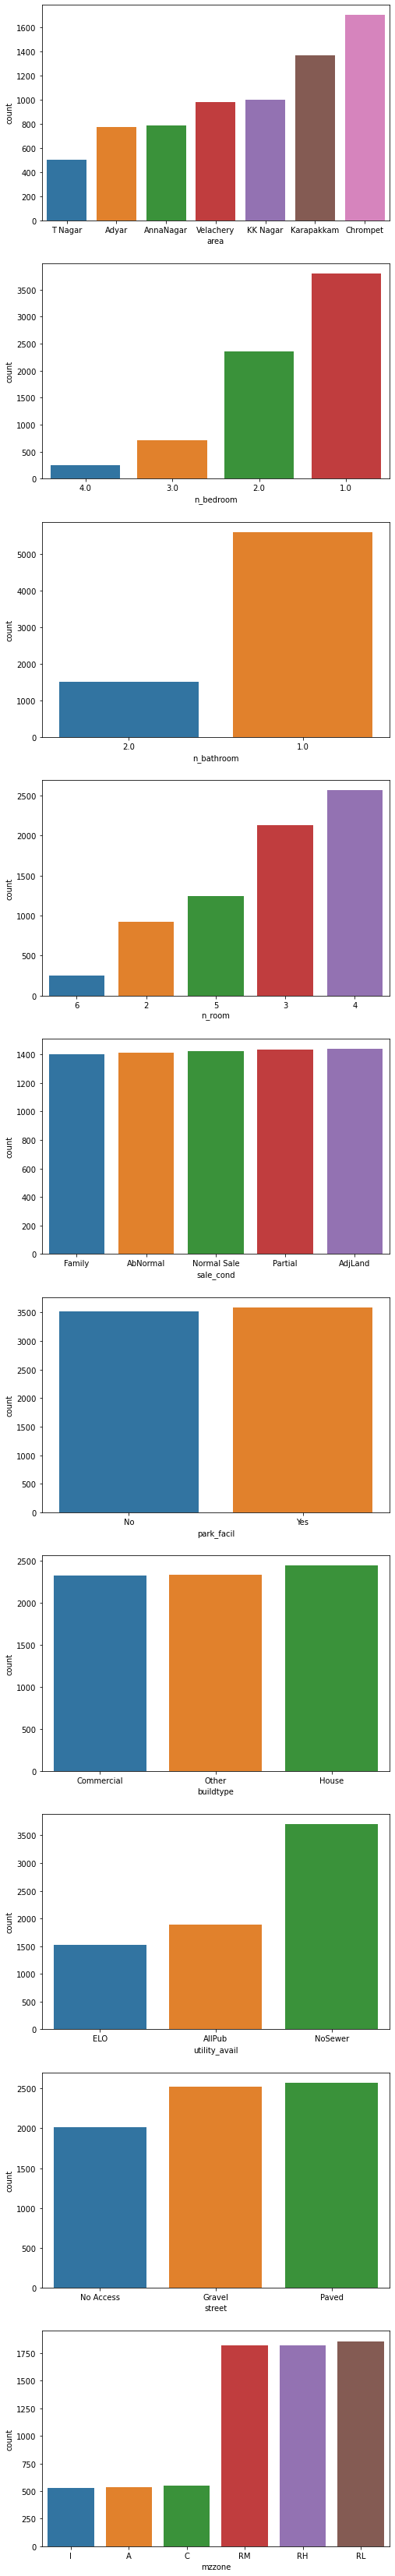

In [23]:
figure, axes = plt.subplots(len(cate_col),1,figsize=(8,6*len(cate_col)))
for index,i in enumerate(cate_col):
    sns.countplot(ax=axes[index], x=i, data= data, order = data[i].value_counts().index[::-1])

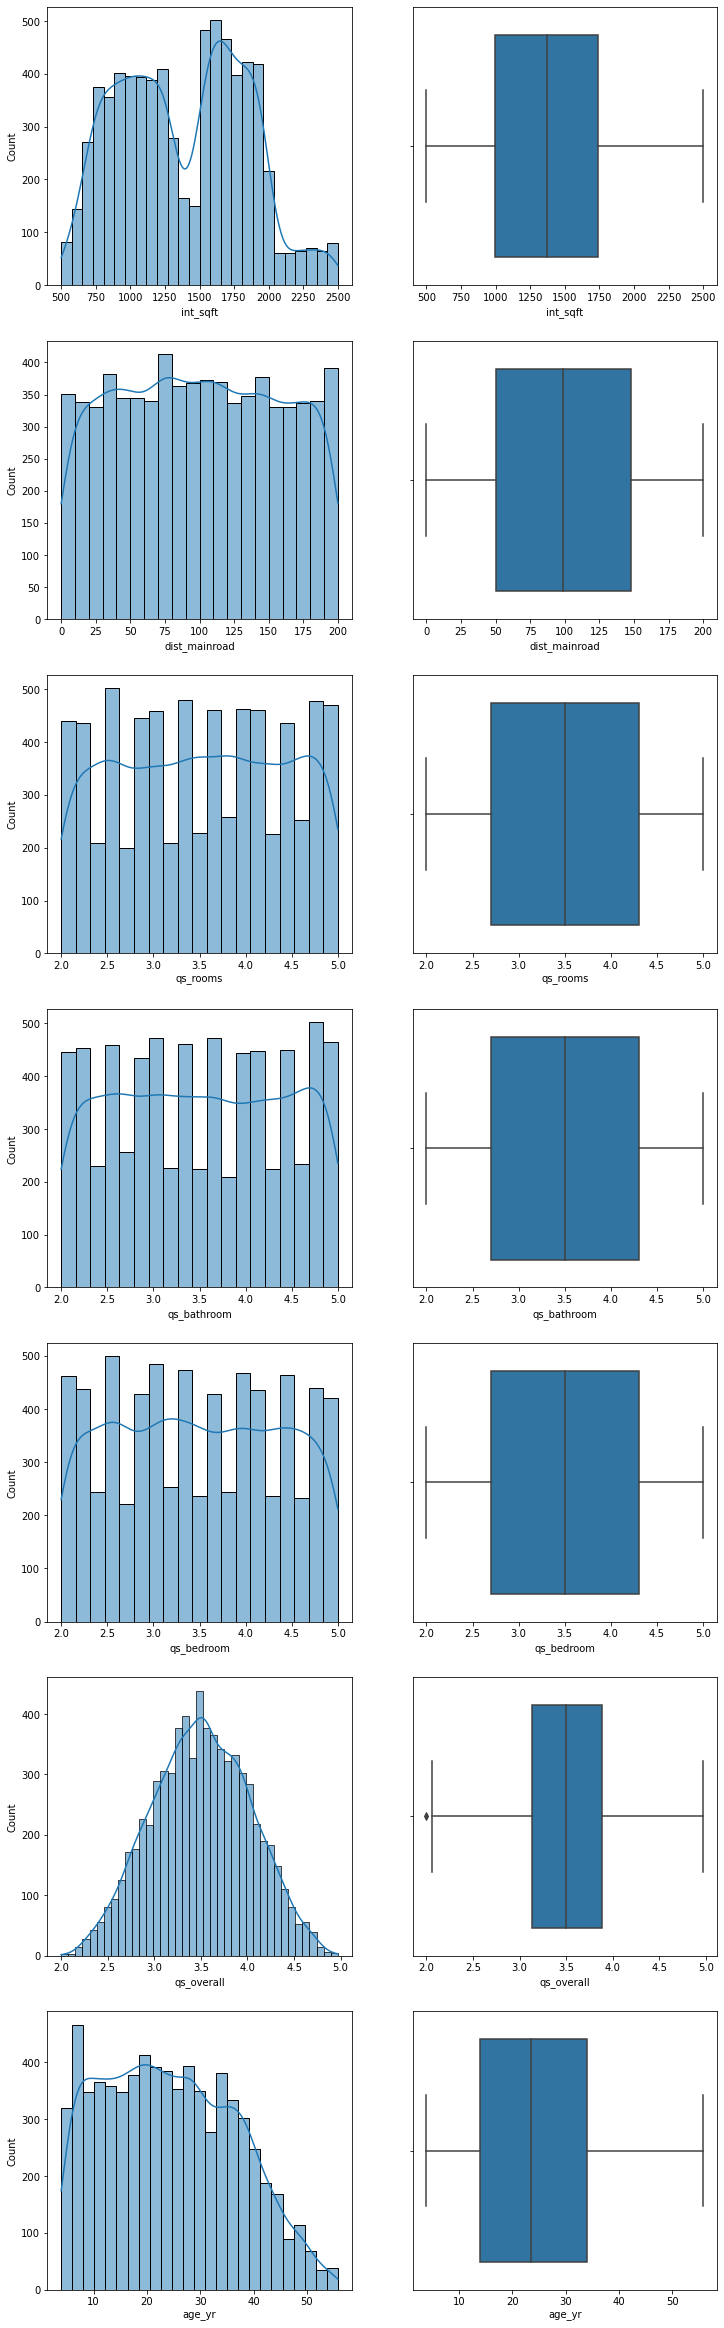

In [24]:
figure, axes = plt.subplots(len(nume_col),2,figsize=(12,6*len(nume_col)))
for index,i in enumerate(nume_col):
    sns.histplot(ax = axes[index][0], x=data[i], data=data, kde = True)
    sns.boxplot(ax = axes[index][1], x=data[i], data=data, orient = 'h')

array([[<AxesSubplot:title={'center':'int_sqft'}>,
        <AxesSubplot:title={'center':'dist_mainroad'}>,
        <AxesSubplot:title={'center':'n_bedroom'}>],
       [<AxesSubplot:title={'center':'n_bathroom'}>,
        <AxesSubplot:title={'center':'n_room'}>,
        <AxesSubplot:title={'center':'qs_rooms'}>],
       [<AxesSubplot:title={'center':'qs_bathroom'}>,
        <AxesSubplot:title={'center':'qs_bedroom'}>,
        <AxesSubplot:title={'center':'qs_overall'}>],
       [<AxesSubplot:title={'center':'sales_price'}>,
        <AxesSubplot:title={'center':'age_yr'}>, <AxesSubplot:>]],
      dtype=object)

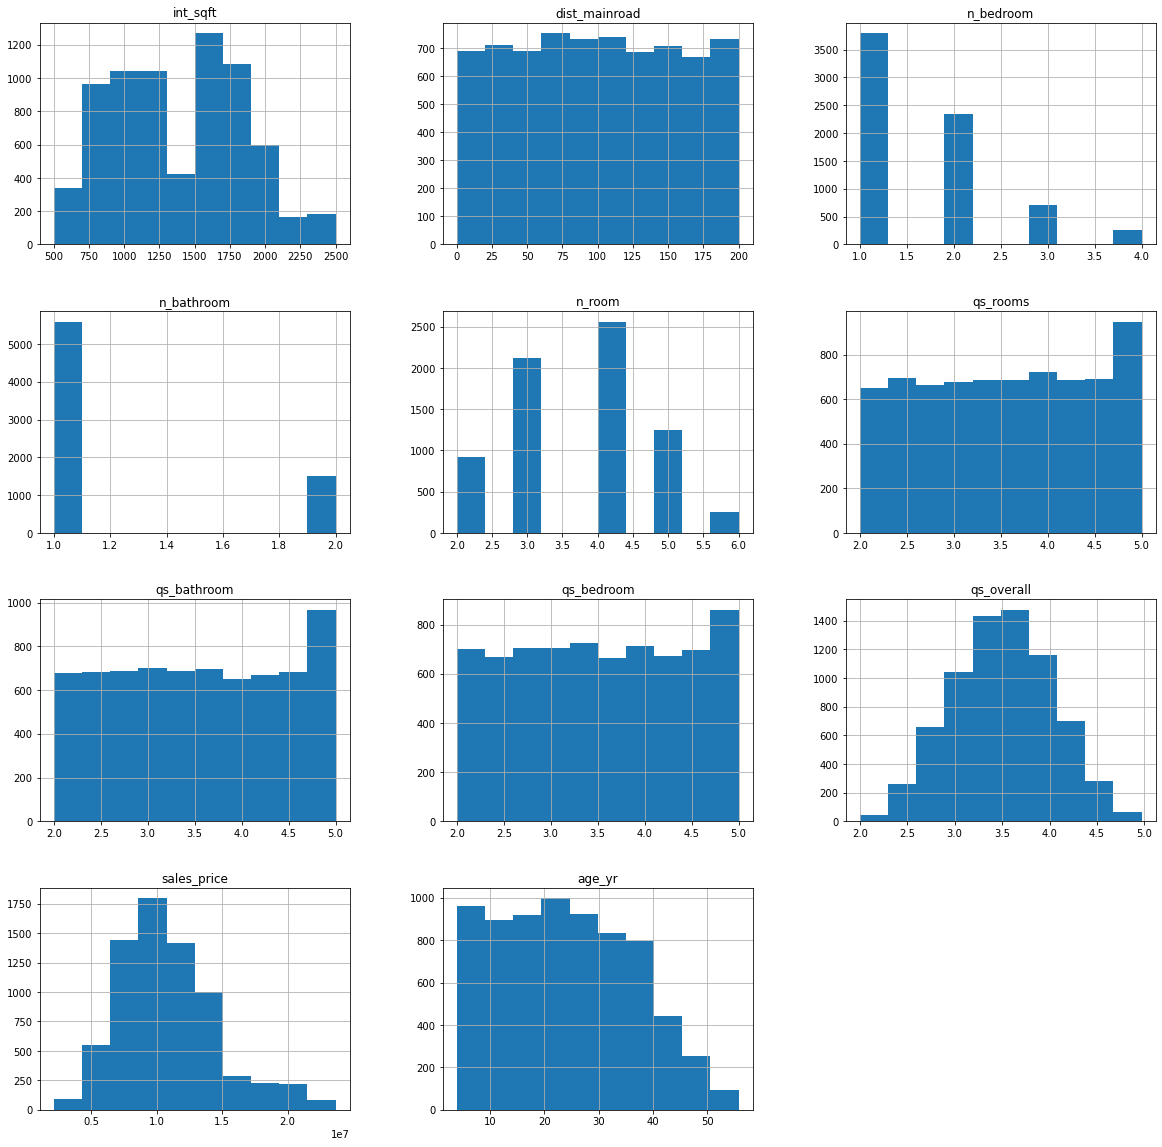

In [25]:
data.hist(figsize=(20,20))

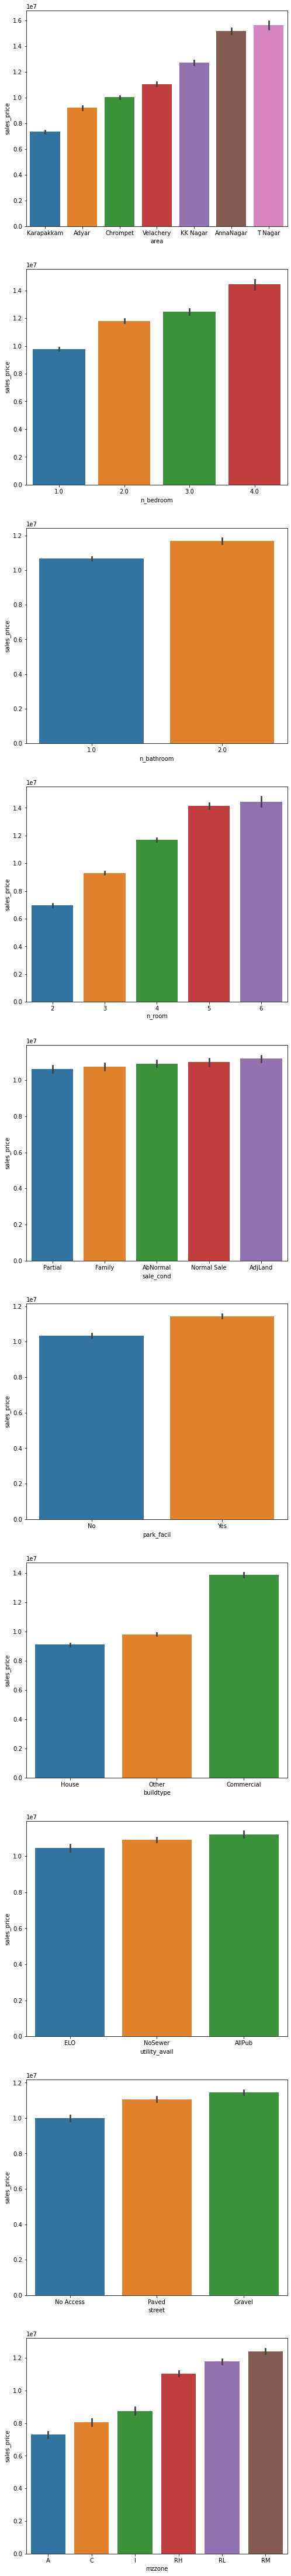

In [26]:
figure, axes = plt.subplots(len(cate_col),1,figsize=(8,8*len(cate_col)))
for index,i in enumerate(cate_col):
    sns.barplot(ax=axes[index], x=i, y= 'sales_price', data=data, order = data.groupby(i)['sales_price'].mean().reset_index().sort_values('sales_price')[i])

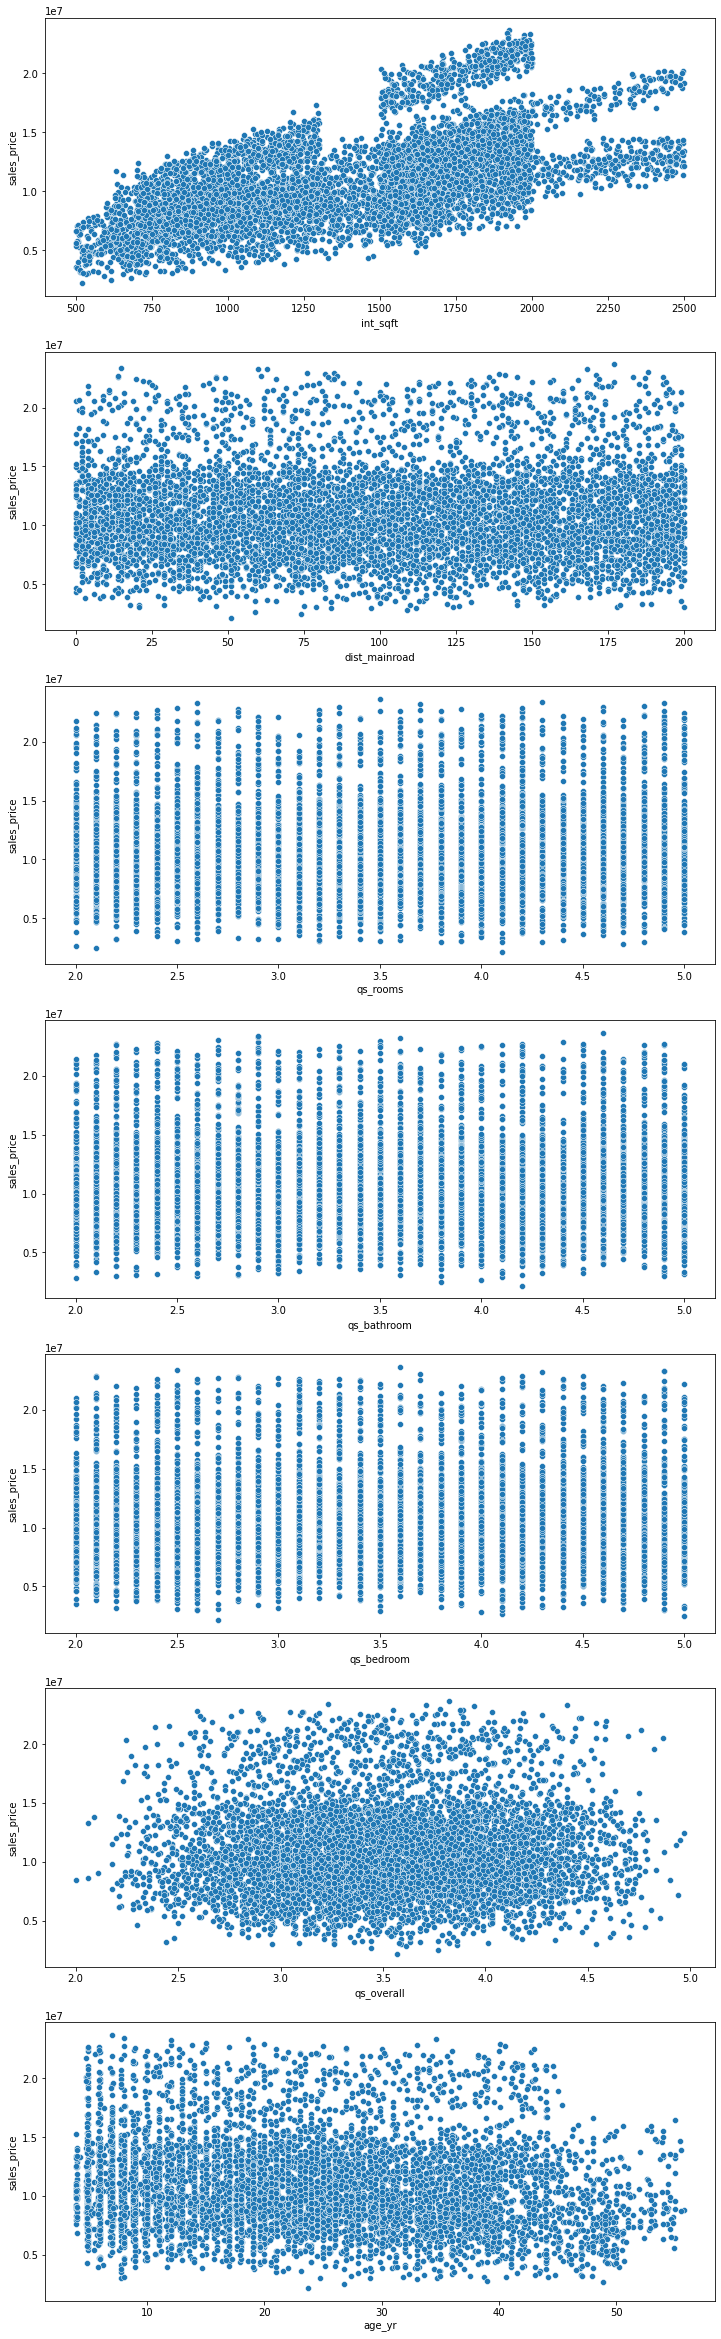

In [27]:
figure, axes = plt.subplots(len(nume_col),1,figsize=(12,6*len(nume_col)))
for index,i in enumerate(nume_col):
    sns.scatterplot(ax = axes[index], x=data[i], data=data, y = data['sales_price'])

In [28]:
#one hot encoding
data = pd.get_dummies(data,columns = ['buildtype'])

In [29]:
#Label Encoding
data.area = data.area.map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'AnnaNagar':5, 'T Nagar':6})
data.sale_cond = data.sale_cond.map({'Partial':0,'Family':1, 'AbNormal':2, 'Normal Sale':3, 'AdjLand':4})
data.park_facil = data.park_facil.map({'No':0, 'Yes':1})
data.utility_avail = data.utility_avail.map({'ELO':0, 'NoSewer':1,'AllPub':2 })
data.street = data.street.map({'No Access':0, 'Paved':1, 'Gravel':2})
data.mzzone = data.mzzone.map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
data.n_room = data.n_room.map({2:0,3:1,4:2,5:3,6:4})

In [30]:
data.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,age_yr,buildtype_Commercial,buildtype_House,buildtype_Other
0,0,1004,131,1.0,1.0,1,2,1,2,1,0,4.0,3.9,4.9,4.330,7600000,43.9,1,0,0
1,5,1986,26,2.0,1.0,3,2,0,2,2,4,4.9,4.2,2.5,3.765,21717770,11.0,1,0,0
2,1,909,70,1.0,1.0,1,2,1,0,2,5,4.1,3.8,2.2,3.090,13159200,19.6,1,0,0
3,3,1855,14,3.0,2.0,3,1,0,1,1,2,4.7,3.9,3.6,4.010,9630290,22.0,0,0,1
4,0,1226,84,1.0,1.0,1,2,1,2,2,1,3.0,2.5,4.1,3.290,7406250,29.6,0,0,1


In [31]:
data.drop(['dist_mainroad','qs_rooms','qs_bathroom', 'qs_bedroom', 'qs_overall'], axis = 1, inplace = True)
data

,area,int_sqft,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,utility_avail,street,mzzone,sales_price,age_yr,buildtype_Commercial,buildtype_House,buildtype_Other
0,0,1004,1.0,1.0,1,2,1,2,1,0,7600000,43.9,1,0,0
1,5,1986,2.0,1.0,3,2,0,2,2,4,21717770,11.0,1,0,0
2,1,909,1.0,1.0,1,2,1,0,2,5,13159200,19.6,1,0,0
3,3,1855,3.0,2.0,3,1,0,1,1,2,9630290,22.0,0,0,1
4,0,1226,1.0,1.0,1,2,1,2,2,1,7406250,29.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1.0,1.0,0,4,0,0,0,6,5353000,49.1,0,0,1
7105,3,1897,3.0,2.0,3,1,1,1,0,4,10818480,8.8,0,0,1
7106,3,1614,2.0,1.0,2,3,0,1,2,2,8351410,28.6,0,1,0
7107,0,787,1.0,1.0,0,0,1,0,1,5,8507000,31.3,1,0,0


In [32]:
y = data['sales_price']
X = data.drop(['sales_price'], axis=1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

6658    10311140
2877     9585000
6010    13104880
4078     8527375
4688     5976000
          ...   
6475     9052280
123      4294000
6078     6059870
1699     6766430
1145    15082700
Name: sales_price, Length: 1422, dtype: int64

In [34]:
X_train.shape, X_test.shape

((5687, 14), (1422, 14))

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [36]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
print(regressor.intercept_)

3951327.1309050787


In [38]:
print(regressor.coef_)

[ 5.50788240e+05  1.48968563e+03 -1.58469918e+06  2.30692760e+05
  1.73732812e+06  1.56747461e+05  1.03214204e+06  7.89964374e+04
  4.91192493e+05  4.63290768e+05 -1.82777816e+04  2.88477445e+06
 -1.78210078e+06 -1.10267368e+06]


In [39]:
y_pred = regressor.predict(X_test)
y_pred

array([11054238.63913767, 10664515.85042177, 12958959.01665314, ...,
        4512408.63362435,  7255810.5101783 , 14600451.8625462 ])

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
6658,10311140,1.105424e+07
2877,9585000,1.066452e+07
6010,13104880,1.295896e+07
4078,8527375,8.875583e+06
4688,5976000,5.509236e+06
...,...,...
6475,9052280,9.119513e+06
123,4294000,4.487745e+06
6078,6059870,4.512409e+06
1699,6766430,7.255811e+06


In [41]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9233604404333318


In [42]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [44]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9212846778682143

In [45]:
dict = {}
for i in range(3,15):
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(X_train, y_train)
    dict[i] = {'tr': rf.score(X_train, y_train), 'te':rf.score(X_test, y_test)}
    print("for max depth = ", i)
    print("Training score: ", rf.score(X_train, y_train))
    print("Testing score: ", rf.score(X_test, y_test))

for max depth =  3
Training score:  0.8095819111731692
Testing score:  0.8099776507931201
for max depth =  4
Training score:  0.8971094019704883
Testing score:  0.8913770929672459
for max depth =  5
Training score:  0.9341993013414932
Testing score:  0.9277366674893317
for max depth =  6
Training score:  0.9571198705599323
Testing score:  0.950209510823299
for max depth =  7
Training score:  0.9727773675489331
Testing score:  0.9660030775540519
for max depth =  8
Training score:  0.9832988249973467
Testing score:  0.9760053037550307
for max depth =  9
Training score:  0.9900263465209188
Testing score:  0.9820972347666194
for max depth =  10
Training score:  0.9941788258892895
Testing score:  0.9860375106760595
for max depth =  11
Training score:  0.9964300213900862
Testing score:  0.9877836022151303
for max depth =  12
Training score:  0.9975841592211443
Testing score:  0.9890370121340282
for max depth =  13
Training score:  0.9981248300129285
Testing score:  0.9894319116893772
for max

# Conclusion:
Considering all the accuracy values given by models, it is observed that Random Forest Model performed with the best accuracy of 98.96 %.